<a href="https://colab.research.google.com/github/prpawan03/marvel-lvl2/blob/main/task4/ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import statistics
from sklearn import preprocessing

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')
%matplotlib inline

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test (1).csv')
test_id = test['PassengerId']
combine = [train, test]

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_df = train
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


division of gender across classes

<Axes: xlabel='Pclass', ylabel='count'>

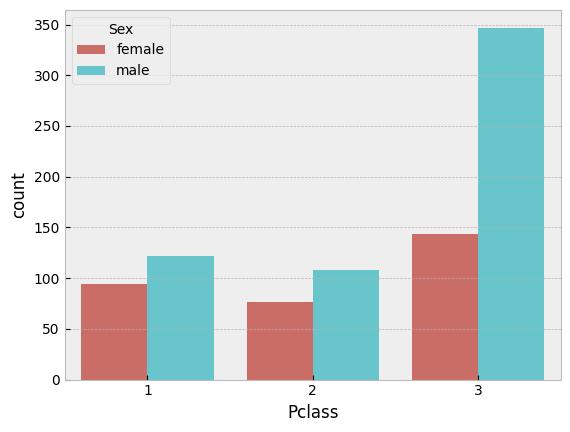

In [ ]:
sns.countplot(x='Pclass', data=titanic_df, hue='Sex',palette='hls')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


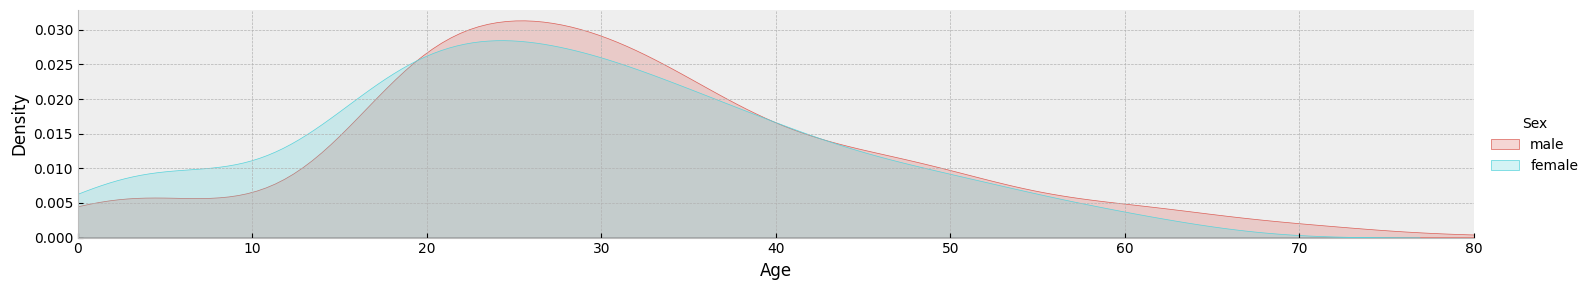

In [ ]:
as_fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=5 , palette = 'hls')

as_fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

as_fig.set(xlim=(0,oldest))

as_fig.add_legend()
#age classification

<Axes: xlabel='Pclass', ylabel='count'>

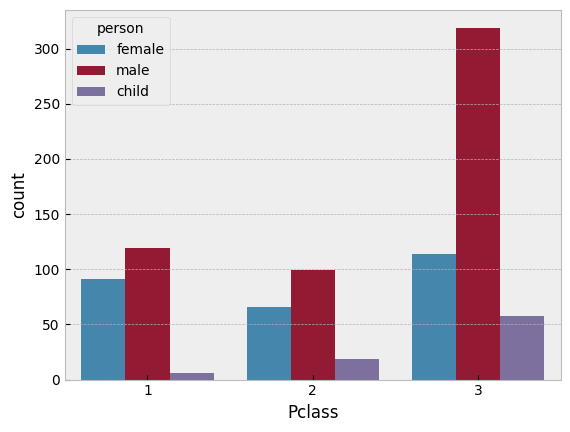

In [ ]:
def titanic_children(passenger):

    age , sex = passenger
    if age <16:
        return 'child'
    else:
        return sex

titanic_df['person'] = titanic_df[['Age','Sex']].apply(titanic_children,axis=1)
sns.countplot(x='Pclass', data=titanic_df, hue='person')


survival rate among genders

<Axes: xlabel='Pclass', ylabel='Survived'>

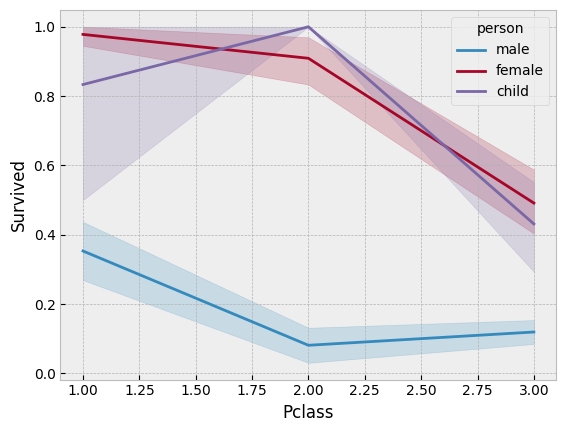

In [ ]:
sns.lineplot(x='Pclass',y='Survived',data=titanic_df,hue='person')


In [ ]:
for df in combine:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
trans1=combine[0]
trans1.head()
#family size using siblings and parents columns

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,1


In [ ]:
for df in combine:
    df['Alone'] = 0
    df.loc[df['FamilySize'] == 1, 'Alone'] = 1
trans2=combine[0]
trans2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,1,1


data normalisation

In [ ]:
for df in combine: # fill missing values for 'Embarked'
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
trans3=combine[0]
print(trans3.info())
trans3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  person       891 non-null    object 
 13  FamilySize   891 non-null    int64  
 14  Alone        891 non-null    int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 104.5+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,1,1


In [ ]:
for df in combine: # fill missing values for 'Fare'
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    df['farecat'] = 0
    df.loc[df['Fare'] <= 10.5, 'farecat'] = 0
    df.loc[(df['Fare'] > 10.5) & (df['Fare'] <= 21.679), 'farecat'] = 1
    df.loc[(df['Fare'] > 21.679) & (df['Fare'] <= 39.688), 'farecat'] = 2
    df.loc[(df['Fare'] > 39.688) & (df['Fare'] <= 512.329), 'farecat'] = 3
    df.loc[df['Fare'] > 512.329, 'farecat'] = 4

trans4=combine[0]
trans4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  person       891 non-null    object 
 13  FamilySize   891 non-null    int64  
 14  Alone        891 non-null    int64  
 15  farecat      891 non-null    int64  
dtypes: float64(2), int64(8), object(6)
memory usage: 111.5+ KB


In [ ]:
for df in combine: # fill missing values for 'Age' (random values which are within standard deviation of mean)
    avg = df['Age'].mean()
    std = df['Age'].std()
    NaN_count = df['Age'].isnull().sum()

    age_fill = np.random.randint(avg-std, avg+std, NaN_count)
    df.loc[df['Age'].isnull(), 'Age'] = age_fill
    df['Age'] = df['Age'].astype(int)

    df['agecat']=0
    df.loc[df['Age'] <= 16, 'agecat'] = 0
    df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'agecat'] = 1
    df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'agecat'] = 2
    df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'agecat'] = 3
    df.loc[df['Age'] > 64, 'agecat'] = 4
trans5=combine[0]
trans5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  person       891 non-null    object 
 13  FamilySize   891 non-null    int64  
 14  Alone        891 non-null    int64  
 15  farecat      891 non-null    int64  
 16  agecat       891 non-null    int64  
dtypes: float64(1), int64(10), object(6)
memory usage: 118.5+ KB


In [ ]:
import re
def only_title(name): # manipulation 'Name', extracting titles from names
    title = re.findall(' ([A-Za-z]+)\.', name)
    if title:
        return title[0]

for df in combine:
    df['Title'] = df['Name'].apply(only_title)

for df in combine:
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major',
                                     'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')


trans6=combine[0]
trans6.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,FamilySize,Alone,farecat,agecat,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,2,0,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,2,0,3,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,1,1,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,2,0,3,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,1,1,0,2,Mr


In [ ]:
for df in combine: # add feature 'Alone'
    df['gender'] = 0
    df.loc[df['Sex'] == "male", 'gender'] = 1
trans6=combine[0]


stacking

In [ ]:
def accuracy(k,prediction):
    match=0
    i=0
    for x in prediction:
        if x==k[i]:
            match+=1
        i+=1
    return(match/k.size)

In [ ]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
X  = train[['gender','Pclass','agecat']]
X1 = test[['gender','Pclass','agecat']]
Y = train[['Survived']]
clf1 = tree.DecisionTreeClassifier()
clf1 = clf1.fit(X,Y)
pred1 = clf1.predict(X)
tpred1 = clf1.predict(X1)
k=np.array(Y)
print(accuracy(k,pred1))
#model1 = tree with gender age and class

0.8024691358024691


In [ ]:
X  = train[['gender','Pclass','farecat',]]
X2 = test[['gender','Pclass','farecat',]]
Y = train[['Survived']]
X.insert(1, 'pred1', pd.DataFrame({"pread1":pred1}))
X2.insert(1, 'pred1', pd.DataFrame({"pread1":tpred1}))
clf2 = tree.DecisionTreeClassifier()
clf2 = clf2.fit(X,Y)
pred2 = clf2.predict(X)
tpred2 = clf2.predict(X2)
print(accuracy(k,pred2))
#model2 = (tree with gender class and fare)

0.819304152637486


In [ ]:
X  = train[['gender','Pclass','farecat','FamilySize']]
X3 = test[['gender','Pclass','farecat','FamilySize']]
Y = train[['Survived']]
clf3=RandomForestClassifier(n_estimators=1000)
clf3.fit(X,Y)
pred3=clf3.predict(X)
tpred3 = clf3.predict(X3)
print(accuracy(k,pred3))
#random forrest on gender class fare and family size

<ipython-input-39-14efa252eff9>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf3.fit(X,Y)


0.8305274971941639


In [ ]:
X  = train[['gender','FamilySize','agecat','Pclass']]
Y = train[['Survived']]
X4 = test[['gender','FamilySize','agecat','Pclass']]
clf4=RandomForestClassifier(n_estimators=1000)
clf4.fit(X,Y)
pred4=clf4.predict(X)
tpred4=clf4.predict(X4)
print(accuracy(k,pred4))
#random forrest on gender class age and family size

<ipython-input-27-2e329f630105>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf4.fit(X,Y)


0.835016835016835


without stacking

In [ ]:
from sklearn.linear_model import LogisticRegression
X  = train[['gender','FamilySize','agecat','Pclass','Parch','SibSp','Fare']]
Y = train[['Survived']]
X6=test[['gender','FamilySize','agecat','Pclass','Parch','SibSp','Fare']]
lreg = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
lreg.fit(X,Y)
pred6=lreg.predict(X)
tpred6=lreg.predict(X5)
print(accuracy(k,pred6))

0.792368125701459


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
arr=[]
for i in pred5:
    arr=arr+ [i]
print(accuracy(pred1,pred2))
print(accuracy(pred1,pred3))
print(accuracy(pred1,pred4))
print(accuracy(pred1,pred6))
print(accuracy(pred2,pred3))
print(accuracy(pred2,pred4))
print(accuracy(pred2,pred6))
print(accuracy(pred3,pred4))
print(accuracy(pred3,pred6))
print(accuracy(pred4,pred6))
#comparing accuracies pariwise

0.9225589225589226
0.8731762065095399
0.8888888888888888
0.8507295173961841
0.9281705948372615
0.9438832772166106
0.9124579124579124
0.9438832772166106
0.9147025813692481
0.8967452300785634


In [ ]:
totalcalc=[]
for i in range(0,len(pred1)):
    a1=pred1[i]
    a1+=pred2[i]*2**1
    a1+=pred3[i]*2**2
    a1+=pred4[i]*2**3
    a1+=pred6[i]*2**4
    totalcalc+=[a1]
    #combining predictions into single prediction

In [ ]:
arrx0=[0 for i in range(0,32)]
arrx1=[0 for i in range(0,32)]
for i in range(0,len(totalcalc)):
    if k[i]==1:
        arrx1[totalcalc[i]]+=1
    else:
        arrx0[totalcalc[i]]+=1

arrxf=[0 for i in range(0,32)]
for i in range(0,32):
    if arrx1[i]>arrx0[i]:
        arrxf[i]=1
    else:
        arrxf[i]=0
        #storing predictions in array

In [ ]:
trtotalcalc=[]
for i in range(0,len(pred1)):
    a1=pred1[i]
    a1+=pred2[i]*2**1
    a1+=pred3[i]*2**2
    a1+=pred4[i]*2**3
    a1+=pred6[i]*2**4
    trtotalcalc+=[arrxf[a1]]
accuracy(k,trtotalcalc)
#ensemble the training set to create a new set of predictions.

0.8473625140291807

In [ ]:
ttotalcalc=[]
for i in range(0,len(tpred1)):
    a1=tpred1[i]
    a1+=tpred2[i]*2**1
    a1+=tpred3[i]*2**2
    a1+=tpred4[i]*2**3
    a1+=tpred6[i]*2**4
    ttotalcalc+=[arrxf[a1]]


after stacking

In [ ]:
print(accuracy(pred1,trtotalcalc))
print(accuracy(pred2,trtotalcalc))
print(accuracy(pred3,trtotalcalc))
print(accuracy(pred4,trtotalcalc))
print(accuracy(pred6,trtotalcalc))

0.8810325476992144
0.9405162738496072
0.9607182940516273
0.978675645342312
0.8821548821548821


In [ ]:
dummy_data1 = {
        'pred1': pred1,
        'pred2': pred2,
        'pred3':pred3,
        'pred4':pred4,
        #'pred5':arr
        }

df1 = pd.DataFrame(dummy_data1)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(df1,Y)

In [ ]:
predt=clf.predict(df1)
print(accuracy(k,predt))

0.8428731762065096
